In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Test/mercedes/27.jpg
/kaggle/input/Test/mercedes/38.jpg
/kaggle/input/Test/mercedes/45.jpg
/kaggle/input/Test/mercedes/30.jpg
/kaggle/input/Test/mercedes/36.jpg
/kaggle/input/Test/mercedes/28.jpg
/kaggle/input/Test/mercedes/44.jpg
/kaggle/input/Test/mercedes/34.jpg
/kaggle/input/Test/mercedes/29.jpg
/kaggle/input/Test/mercedes/35.jpg
/kaggle/input/Test/mercedes/33.jpg
/kaggle/input/Test/mercedes/39.jpg
/kaggle/input/Test/mercedes/43.jpg
/kaggle/input/Test/mercedes/42.jpg
/kaggle/input/Test/mercedes/41.jpg
/kaggle/input/Test/mercedes/37.jpg
/kaggle/input/Test/mercedes/32.jpg
/kaggle/input/Test/mercedes/40.jpg
/kaggle/input/Test/mercedes/31.jpg
/kaggle/input/Test/audi/27.jpg
/kaggle/input/Test/audi/22.jpg
/kaggle/input/Test/audi/28.jpg
/kaggle/input/Test/audi/25.jpg
/kaggle/input/Test/audi/21.jpg
/kaggle/input/Test/audi/29.jpg
/kaggle/input/Test/audi/23.jpg
/kaggle/input/Test/audi/24.jpg
/kaggle/input/Test/audi/26.jpg
/kaggle/input/Test/lamborghini/27.jpg
/kaggle/input/Test

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/Train'
valid_path = '/kaggle/input/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
  # useful for getting number of output classes
folders = glob('/kaggle/input/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv4_block6_3_conv (Conv2D)    (None, 14, 14, 1024) 263168      conv4_block6_2_relu[0][0]        
__________________________________________________________________________________________________
conv4_block6_3_bn (BatchNormali (None, 14, 14, 1024) 4096        conv4_block6_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block6_add (Add)          (None, 14, 14, 1024) 0           conv4_block5_out[0][0]           
                                                                 conv4_block6_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block6_out (Activation)   (None, 14, 14, 1024) 0           conv4_block6_add[0][0]           
__________________________________________________________________________________________________
conv5_bloc

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/kaggle/input/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/kaggle/input/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
2/2 [==============================] - 2s 1s/step - loss: 6.8200 - accuracy: 0.2812 - val_loss: 9.7664 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 514ms/step - loss: 10.0012 - accuracy: 0.3281 - val_loss: 8.4784 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 506ms/step - loss: 5.3521 - accuracy: 0.3438 - val_loss: 5.0384 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 482ms/step - loss: 5.5295 - accuracy: 0.3906 - val_loss: 5.0131 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 505ms/step - loss: 4.4729 - accuracy: 0.4688 - val_loss: 3.6213 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 1s 475ms/step - loss: 4.2641 - accuracy: 0.3750 - val_loss: 1.8018 - val_accuracy: 0.5517
Epoch 7/50
2/2 [==============================] - 1s 510ms/step - loss: 2.7580 - accuracy: 0.3594 - val_loss: 5.3796 - val_accuracy: 0.1552
Epoch 8/50
2/2 [======

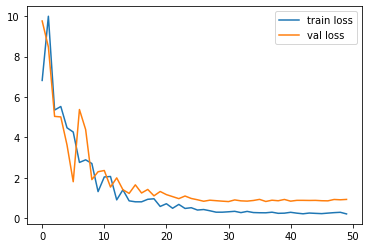

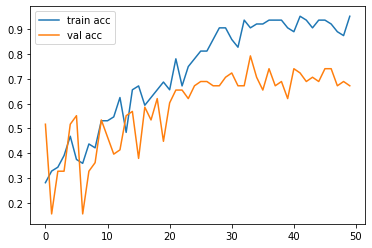

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:
y_pred = model.predict(test_set)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2,
       2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1])

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [24]:
img=image.load_img('/kaggle/input/Test/mercedes/31.jpg',target_size=(224,224))

In [25]:
x=image.img_to_array(img)
x

array([[[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       [[196., 199., 204.],
        [196., 199., 204.],
        [196., 199., 204.],
        ...,
        [196., 199., 206.],
        [196., 199., 206.],
        [196., 199., 206.]],

       ...,

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 37.,  37.,  37.],
        [ 32.,  32.,  32.],
        [ 30.,  30.,  30.],
        ...,
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.],
        [ 61.,  61.,  61.]],

       [[ 42.,  42.,  42.],
        [ 36.,  36.,  36.],
        [ 34.,  

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.00112275, 0.00299232, 0.99588495]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

In [ ]:
a==2